# Centrality

- Definition of Centrality
- Compare and contrast popular centrality measures on dataset
    - Degree
    - Closeness
    - Betweenness
    - Eigenvector

<img width="500" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Graph_betweenness.svg/2000px-Graph_betweenness.svg.png">

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GA = nx.read_gexf('ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


## Degree Centrality

The __degree__ of a node is the number of other nodes to which it is connected. 

![](https://www.openabm.org/files/books/1928/fig102.png)

NetworkX's degree centrality is calculated by taking the degree of the node and dividing by `n-1` where where `n` is the number of nodes in `G`.

$$ {C_D (u)} = \frac{deg(u)}{{n-1}} $$

In [3]:
GA.degree("grey")

4

In [7]:
print(GA.degree())

[('lexi', 3), ('sloan', 5), ('karev', 7), ('owen', 2), ('yang', 3), ('altman', 2), ('torres', 4), ('arizona', 1), ('derek', 2), ('grey', 4), ('izzie', 4), ("o'malley", 4), ('colin', 1), ('preston', 1), ('kepner', 1), ('addison', 3), ('nancy', 1), ('olivia', 2), ('mrs. seabury', 1), ('chief', 2), ('adele', 1), ('ellis grey', 2), ('thatch grey', 2), ('susan grey', 1), ('bailey', 2), ('tucker', 1), ('hank', 1), ('denny', 1), ('finn', 1), ('steve', 1), ('ben', 1), ('avery', 1)]


In [8]:
sorted(GA.degree(), key=lambda x:x[1], reverse=True)[:5]

[('karev', 7), ('sloan', 5), ('torres', 4), ('grey', 4), ('izzie', 4)]

In [6]:
# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners

# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (degree_grey / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)

# Double check
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])

def check_equal(val1, val2):
    assert (val1 == val2),"Centrality measure calculated incorrectly!"
    return "Values match, good job!"

check_equal(degree_centrality_grey, nx.degree_centrality(GA)["grey"])

Calculated degree centrality for Grey: 0.12903225806451613
Networkx degree centrality for Grey: 0.12903225806451613


'Values match, good job!'

In [26]:
degree_centrality = nx.degree_centrality(GA)
degree_centrality

{'lexi': 0.0967741935483871,
 'sloan': 0.16129032258064516,
 'karev': 0.22580645161290322,
 'owen': 0.06451612903225806,
 'yang': 0.0967741935483871,
 'altman': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'arizona': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'grey': 0.12903225806451613,
 'izzie': 0.12903225806451613,
 "o'malley": 0.12903225806451613,
 'colin': 0.03225806451612903,
 'preston': 0.03225806451612903,
 'kepner': 0.03225806451612903,
 'addison': 0.0967741935483871,
 'nancy': 0.03225806451612903,
 'olivia': 0.06451612903225806,
 'mrs. seabury': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'adele': 0.03225806451612903,
 'ellis grey': 0.06451612903225806,
 'thatch grey': 0.06451612903225806,
 'susan grey': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'tucker': 0.03225806451612903,
 'hank': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'finn': 0.03225806451612903,
 'steve': 0.03225806451612903,
 'ben': 0.03225806451612903,
 'avery': 0.

In [27]:
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 0.22580645161290322),
 ('sloan', 0.16129032258064516),
 ('torres', 0.12903225806451613),
 ('grey', 0.12903225806451613),
 ('izzie', 0.12903225806451613)]

# Closeness Centrality
Closeness Centrality measures how many "hops" it would take to reach every other node in a network (taking the shortest path). It can be informally thought as 'average distance' to all other nodes.

<img style="float: center" src="https://toreopsahl.files.wordpress.com/2008/12/geodesic-n1.png?w=455">

In NetworkX, it the reciporical of of the *average* value, which normalizes the value in a 0 to 1 range. 

$$ C_C (u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)} $$


In [36]:
grey_shortest_path = nx.shortest_path_length(GA,source="grey")
print(grey_shortest_path)

{'grey': 0, 'derek': 1, "o'malley": 1, 'finn': 1, 'steve': 1, 'addison': 2, 'torres': 2, 'izzie': 2, 'olivia': 2, 'sloan': 3, 'karev': 3, 'arizona': 3, 'hank': 3, 'denny': 3, 'lexi': 4, 'altman': 4, 'nancy': 4, 'kepner': 4, 'mrs. seabury': 4, 'avery': 5, 'owen': 5, 'yang': 6, 'colin': 7, 'preston': 7}


`If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately.  The closeness centrality is normalized to (n-1)/(|G|-1) where n is the number of nodes in the connected part of graph containing the node.`

In [40]:
# Sum of the shortest paths to all other characters
grey_sum_shortest_path = sum(grey_shortest_path.values())  # 77

# Closeness centrality for Grey
closeness_centrality_grey = (total_nodes_minus_grey / grey_sum_shortest_path)
print("Calculated closeness centrality for Grey:", closeness_centrality_grey)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey, nx.closeness_centrality(GA)["grey"])

Calculated closeness centrality for Grey: 0.4025974025974026
Networkx closeness centrality for Grey: 0.2216170925848345


AssertionError: Centrality measure calculated incorrectly!

In [9]:
nx.closeness_centrality(GA)["grey"]

0.2216170925848345

In [41]:
# View members of different subgraphs
sorted(nx.connected_components(GA), key = len, reverse=True)

[{'addison',
  'altman',
  'arizona',
  'avery',
  'colin',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'owen',
  'preston',
  'sloan',
  'steve',
  'torres',
  'yang'},
 {'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'},
 {'bailey', 'ben', 'tucker'}]

To correct for this, we will use the number of nodes in the `Grey` subgraph instead of the total number of nodes to calculated degree centrality.  Additionally, we'll normalized to `(n-1)/(|G|-1)` where `n` is the number of nodes in the connected part of graph containing the node.

In [43]:
# Number of nodes in Grey subgraph, excluding Grey
total_nodes_minus_grey_sub = len(grey_shortest_path)-1   # 23

# Closeness centrality for Grey (unnormalized)
closeness_centrality_grey = (total_nodes_minus_grey_sub / grey_sum_shortest_path)   # ~0.2987

# Closeness centrality for Grey (normalized)
closeness_centrality_grey_normalized = closeness_centrality_grey * (total_nodes_minus_grey_sub/total_nodes_minus_grey)
print("Calculated closeness centrality for Grey (normalized):", closeness_centrality_grey_normalized)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey_normalized, nx.closeness_centrality(GA)["grey"])

Calculated closeness centrality for Grey (normalized): 0.2216170925848345
Networkx closeness centrality for Grey: 0.2216170925848345


'Values match, good job!'

In [45]:
closeness_centrality = nx.closeness_centrality(GA)
closeness_centrality

{'lexi': 0.26253101736972706,
 'sloan': 0.2892290869327502,
 'karev': 0.2892290869327502,
 'owen': 0.19173613628126135,
 'yang': 0.1594814591498342,
 'altman': 0.2337604949182501,
 'torres': 0.29937747594793435,
 'arizona': 0.21600653327888933,
 'derek': 0.2337604949182501,
 'grey': 0.2216170925848345,
 'izzie': 0.24731182795698925,
 "o'malley": 0.2708653353814644,
 'colin': 0.13228307076769194,
 'preston': 0.13228307076769194,
 'kepner': 0.21067303863002787,
 'addison': 0.2892290869327502,
 'nancy': 0.21067303863002787,
 'olivia': 0.2337604949182501,
 'mrs. seabury': 0.21067303863002787,
 'chief': 0.07373271889400922,
 'adele': 0.05161290322580645,
 'ellis grey': 0.08602150537634408,
 'thatch grey': 0.07373271889400922,
 'susan grey': 0.05161290322580645,
 'bailey': 0.06451612903225806,
 'tucker': 0.04301075268817204,
 'hank': 0.18752215526409075,
 'denny': 0.18752215526409075,
 'finn': 0.17236884978820463,
 'steve': 0.17236884978820463,
 'ben': 0.04301075268817204,
 'avery': 0.196143

In [46]:
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]


[('torres', 0.29937747594793435),
 ('sloan', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ('addison', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]

In [47]:
# average distance of torres:
1 / closeness_centrality['torres']

3.340264650283554

## Betweeness Centrality

Betweenness centrality quantifies the number of times a node acts as a bridge (or "broker") along the shortest path between two other nodes.  

![](https://intl520-summer2011-mas.wikispaces.com/file/view/Simple_Network.gif/238734999/480x360/Simple_Network.gif)

In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness.

$$ C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

where ${\sigma(s, t)}$ is total number of shortest paths from node ${s}$ to node ${t}$ and ${\sigma(s, t|v)}$ is the number of those paths that pass through ${v}$.

In [48]:
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

{'lexi': 0.07741935483870968,
 'sloan': 0.248100358422939,
 'karev': 0.2048745519713262,
 'owen': 0.12903225806451613,
 'yang': 0.09247311827956989,
 'altman': 0.16344086021505377,
 'torres': 0.14440860215053763,
 'arizona': 0.0,
 'derek': 0.038602150537634404,
 'grey': 0.10078853046594982,
 'izzie': 0.10311827956989246,
 "o'malley": 0.11702508960573477,
 'colin': 0.0,
 'preston': 0.0,
 'kepner': 0.0,
 'addison': 0.09480286738351255,
 'nancy': 0.0,
 'olivia': 0.01064516129032258,
 'mrs. seabury': 0.0,
 'chief': 0.0064516129032258064,
 'adele': 0.0,
 'ellis grey': 0.008602150537634409,
 'thatch grey': 0.0064516129032258064,
 'susan grey': 0.0,
 'bailey': 0.002150537634408602,
 'tucker': 0.0,
 'hank': 0.0,
 'denny': 0.0,
 'finn': 0.0,
 'steve': 0.0,
 'ben': 0.0,
 'avery': 0.0}

In [30]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

{'lexi': 0.2642455341015447,
 'sloan': 0.32268309457542504,
 'karev': 0.5027687871890416,
 'owen': 0.03408964112637759,
 'yang': 0.012041089122459103,
 'altman': 0.10442628192357341,
 'torres': 0.3609262932492621,
 'arizona': 0.10564201543690807,
 'derek': 0.12570740328311847,
 'grey': 0.15107836088557305,
 'izzie': 0.28426338654827676,
 "o'malley": 0.302011970950596,
 'colin': 0.003524389734813509,
 'preston': 0.0035243897348135253,
 'kepner': 0.1471588769531377,
 'addison': 0.2784013959452948,
 'nancy': 0.09444834886225348,
 'olivia': 0.23555685153699446,
 'mrs. seabury': 0.1471588769531377,
 'chief': -2.3862941563196042e-17,
 'adele': -3.7131097517017596e-17,
 'ellis grey': -2.3780215129283948e-17,
 'thatch grey': -3.214507807911225e-17,
 'susan grey': 6.186251973963661e-18,
 'bailey': -4.533737386147985e-18,
 'tucker': 3.780326284312539e-17,
 'hank': 0.08320301854301716,
 'denny': 0.08320301854301713,
 'finn': 0.044220171351811284,
 'steve': 0.04422017135181134,
 'ben': -1.67312859

In [31]:
sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]


[('karev', 0.5027687871890416),
 ('torres', 0.3609262932492621),
 ('sloan', 0.32268309457542504),
 ("o'malley", 0.302011970950596),
 ('izzie', 0.28426338654827676)]

In [51]:
nx.clustering(GA)

{'lexi': 0,
 'sloan': 0,
 'karev': 0,
 'owen': 0,
 'yang': 0,
 'altman': 0,
 'torres': 0,
 'arizona': 0,
 'derek': 0,
 'grey': 0,
 'izzie': 0,
 "o'malley": 0,
 'colin': 0,
 'preston': 0,
 'kepner': 0,
 'addison': 0,
 'nancy': 0,
 'olivia': 0,
 'mrs. seabury': 0,
 'chief': 0,
 'adele': 0,
 'ellis grey': 0,
 'thatch grey': 0,
 'susan grey': 0,
 'bailey': 0,
 'tucker': 0,
 'hank': 0,
 'denny': 0,
 'finn': 0,
 'steve': 0,
 'ben': 0,
 'avery': 0}

In [11]:
nx.transitivity(GA)

0

In [17]:
G=nx.Graph()

In [18]:
G.add_nodes_from([1,2,3,5,6,7])

In [22]:
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)



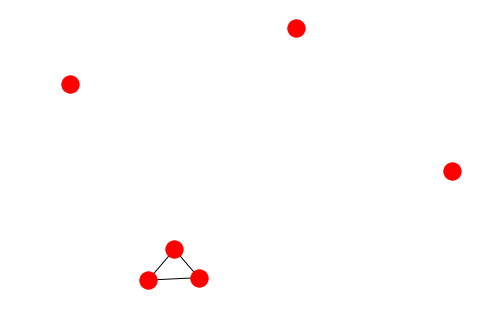

In [23]:
nx.draw(G)

In [25]:
nx.clustering(G)

{1: 1.0, 2: 1.0, 3: 1.0, 5: 0, 6: 0, 7: 0}

In [27]:
pagerank=nx.pagerank(GA)

In [28]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]


[('karev', 0.08213480005894229),
 ('sloan', 0.06040399162797684),
 ('grey', 0.05301786724345161),
 ('izzie', 0.051220398248675865),
 ('yang', 0.04950406513891621)]

In [32]:
nx.authority_matrix(G)

matrix([[2., 1., 1., 0., 0., 0.],
        [1., 2., 1., 0., 0., 0.],
        [1., 1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])